#**Day 3실습에 오신 것을 환영합니다**

본 실습에서는 Convolution layer와 Pooling layer를 numpy를 활용하여 직접 구현합니다. 이후, PyTorch에서 제공하는 모듈을 활용하여 Convolution layer와 Poolying layer를 간단하게 구현합니다.

#### 먼저 필요한 라이브러리를 import하고, 에러를 측정하기 위한 함수를 정의합니다

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2

#에러 측정을 위한 함수
def rel_error(x,y):

    """ returns relative error"""
    return np.max(np.abs(x-y)/(np.maximum(1e-8, np.abs(x) + np.abs(y))))

## Convolution layer: Naive Forward Pass
Convolutional network의 핵심인 convolution 연산을 직접 구현합니다. 코드의 효율성은 따로 고려하지 않아도 되며, 미니특강의 자료를 참고하여, convolution 연산을 구현하는 것이 목적입니다. `def conv_forward_naive()` 함수를 구현하세요.

In [2]:
def conv_forward_naive(x, w, b, conv_param):

    """
    convolutional layer forward pass를 구현합니다.

    본 함수의 입력은 C channels, H height, W width를 갖는 N개의 데이터 입니다.
    해당 입력을 F개의 서로 다른 convolution filter를 사용하여 convolution 연산을 수행합니다.
    각 filter는 C channels, HH height, WW width 크기입니다.

    입력:
    - x: (N, C, H, W) shape를 갖는 입력
    - w: (F, C, HH, WW) shape를 갖는 filter weight
    - b: (F,) shape를 갖는 bias
    - conv_param: 아래 key값을 갖는 딕셔너리:
      - 'stride': stride 크기
      - 'pad': zero padding할 픽셀 크기

    출력:
    - out: (N, F, H', W') shape를 갖는 출력. 이때 H' and W' are given by
    H' = 1 + (H + 2 * pad - HH) / stride
    W' = 1 + (W + 2 * pad - WW) / stride
    - cache: (x, w, b, conv_param)
    """

    ###########################################################################
    # TODO: Implement the convolutional forward pass.                         #
    # Hint: you can use the function np.pad for padding.                      #
    ###########################################################################

    stride = conv_param['stride']
    pad = conv_param['pad']

    (N, C, H, W) = x.shape
    (F, C, HH, WW) = w.shape
    H_out = (int)(1 + (H + 2 * pad - HH) / stride)
    W_out = (int)(1 + (W + 2 * pad - WW) / stride)
    out = np.zeros([N, F, H_out, W_out])
    npad = ((0,0), (0,0), (pad, pad), (pad, pad))
    x_pad = np.pad(x, pad_width = npad, mode = 'constant', constant_values = 0)

    for i in range(N):

        for f in range(F):

            for j in range(H_out):

                for k in range(W_out):

                    x_now = x_pad[i, :, (j*stride):((j*stride)+HH), (k*stride):((k*stride)+WW)] #padding
                    out[i, f, j, k] = np.sum(x_now * w[f]) + b[f] #convolution
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, w, b, conv_param)
    return out, cache



#### 아래 코드를 실행하여, 위에서 구현한 함수가 잘 동작하는 지 확인합니다. 함수가 잘 동작할 경우, 정답지와 difference값이 0에 가까워야 합니다.

In [3]:
#입력 데이터
x_shape = (2, 3, 4, 4)
x = np.linspace(-0.1, 0.5, num = np.prod(x_shape)).reshape(x_shape)

# convolution layer의 사이즈
w_shape = (3, 3, 4, 4)
w = np.linspace(-0.2, 0.3, num = np.prod(w_shape)).reshape(w_shape)
b = np.linspace(-0.1, 0.2, num = 3)

conv_param = {'stride':2, 'pad':1}
out, _ = conv_forward_naive(x, w, b, conv_param)

correct_out = np.array([[[[-0.08759809, -0.10987781],
                           [-0.18387192, -0.2109216 ]],
                          [[ 0.21027089,  0.21661097],
                           [ 0.22847626,  0.23004637]],
                          [[ 0.50813986,  0.54309974],
                           [ 0.64082444,  0.67101435]]],
                         [[[-0.98053589, -1.03143541],
                           [-1.19128892, -1.24695841]],
                          [[ 0.69108355,  0.66880383],
                           [ 0.59480972,  0.56776003]],
                          [[ 2.36270298,  2.36904306],
                           [ 2.38090835,  2.38247847]]]])

# 정답(correct_out)과 구현한 함수의 결과와 비교합니다. difference 는 약 e-8 이어야 합니다.
print('Testing conv_forward_naive')
print('difference: ', rel_error(out, correct_out))

Testing conv_forward_naive
difference:  2.2121476417505994e-08


#### 앞서 구현한 convolution layer는 PyTorch의 nn.Conv2D를 사용하여 간단하게 구현할 수 있습니다. 아래 코드를 통해 그 결과를 확인해봅니다.

[참고링크]


https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d

In [4]:
import torch
import torch.nn as nn
conv_layer = nn.Conv2d(in_channels = 3, out_channels = 3, kernel_size = 4, stride = 2, padding = 1)
conv_layer.weight = nn.Parameter(torch.from_numpy(w).float())
conv_layer.bias = nn.Parameter(torch.from_numpy(b).float())

out_ = conv_layer(torch.from_numpy(x).float())

print('difference: ', rel_error(out_.detach().numpy(), correct_out))

difference:  7.83469228305984e-08


## For fun: Convolution을 활용하여 이미지 처리하기

간단한 시각화를 통해 convolution layer의 역할에 대한 이해를 더 높입니다. 먼저 고양이와 강아지의 이미지를 준비하고, RGB 이미지를 graycale로 변환해주고, 엣지를 검출할수 있는 convolution layer 2개를 각각 매뉴얼하게 만들어 줍니다. 이후 앞서 구현한 함수로 이미지와 convolution 연산을 수행한 뒤 그 결과를 시각화 하여 확인합니다. 결과를 보면, convolution layer와의 연산을 완료한 출력 이미지는 grayscale로 변환되고, 엣지가 검출되는 것을 볼 수 있습니다.


In [5]:
from imageio import imread
from PIL import Image

# 이미지 준비
kitten_path = "kitten.jpg"
puppy_path = "puppy.jpg"
! gdown --id   1NNa7GzYfj7h7-nGj-RfUKF6mEggZ03S7 -O $kitten_path
! gdown --id   14uzsm0s_eIo2kl-0tlzRG9-IFlP6TLXG -O $puppy_path

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NNa7GzYfj7h7-nGj-RfUKF6mEggZ03S7
To: /content/kitten.jpg
100% 21.4k/21.4k [00:00<00:00, 73.7MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14uzsm0s_eIo2kl-0tlzRG9-IFlP6TLXG
To: /content/puppy.jpg
100% 38.4k/38.4k [00:00<00:00, 59.5MB/s]


In [6]:
kitten = imread(kitten_path)
puppy = imread(puppy_path)

# kitten is wide, and puppy is already square

d = kitten.shape[1] - kitten.shape[0]
kitten_cropped = kitten[:, d//2:-d//2, :]

img_size = 200 #make this smaller if it runs too slow
resized_puppy = np.array(Image.fromarray(puppy).resize((img_size, img_size)))
resized_kitten = np.array(Image.fromarray(kitten_cropped).resize((img_size, img_size)))

x = np.zeros((2, 3, img_size, img_size))
x[0, :, :, :] = resized_puppy.transpose((2, 0, 1))
x[1, :, :, :] = resized_kitten.transpose((2, 0, 1))
# 이미지 준비 완료

<ipython-input-6-4e73c659c01e>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  kitten = imread(kitten_path)
<ipython-input-6-4e73c659c01e>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  puppy = imread(puppy_path)


In [7]:
# 2개의 3x3 filter를 갖는 convolution layer 생성
w = np.zeros((2, 3, 3, 3))

# 첫번째 filter는 이미지를 grayscale로 변환합니다.
w[0, 0, :, :] = [[0, 0, 0],[0, 0.3, 0],[0, 0, 0]]
w[0, 1, :, :] = [[0, 0, 0],[0, 0.6, 0],[0, 0, 0]]
w[0, 2, :, :] = [[0, 0, 0],[0, 0.1, 0],[0, 0, 0]]

# 두번째 filter는 RGB 채널 중 blue channel의 수평선을 추출합니다.
w[1, 2, :, :] = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]
b = np.array([0, 128])

# 앞서 설정한 값으로 convolution 연산을 수행
out, _ = conv_forward_naive(x, w, b, {'stride': 1, 'pad': 1})

In [8]:
def imshow_no_ax(img, normalize = True):

    """ Tiny helper to show images as uint8 and remove axis labels """
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)

    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')



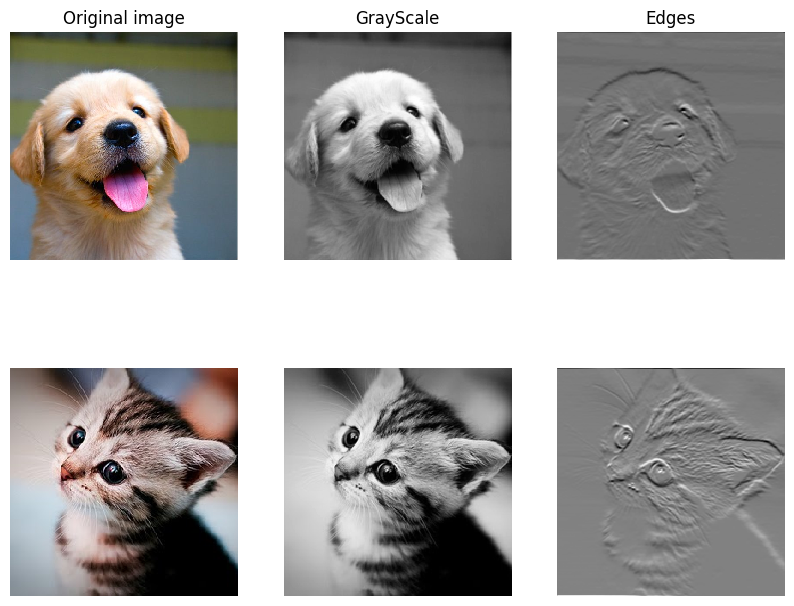

In [9]:
# Show the original images and the results of the conv operation
plt.subplot(2, 3, 1)
imshow_no_ax(puppy, normalize = False)
plt.title('Original image')
plt.subplot(2, 3, 2)
imshow_no_ax(out[0, 0])
plt.title('GrayScale')
plt.subplot(2, 3, 3)
imshow_no_ax(out[0, 1])
plt.title('Edges')
plt.subplot(2, 3, 4)
imshow_no_ax(kitten_cropped, normalize = False)
plt.subplot(2, 3, 5)
imshow_no_ax(out[1, 0])
plt.subplot(2, 3, 6)
imshow_no_ax(out[1, 1])
plt.show()

## Max-Pooling: Naive Forward Pass
Max-pooling을 직접 구현합니다. 코드의 효율성은 따로 고려하지 않아도 되며, 미니특강의 자료를 참고하여, max-pooling을 구현하는 것이 목적입니다. `def max_pool_forward_naive()` 함수를 구현하세요.

In [10]:
def max_pool_forward_naive(x, pool_param):

    """
    max-pooling의 forward pass를 구현합니다.

    입력:
    - x: (N, C, H, W) shape를 갖는 입력
    - pool_param: 아래 key값을 갖는 딕셔너리
      - 'pool_height' : pooling 영역의 높이
      - 'pool_width' : pooling 영역의 너비
      - 'stride' : pooling할 때 stride

    출력:
    - out: pooling을 한 뒤 출력
    - cache: (x, pool_param)
    """

    ###########################################################################
    # TODO: Implement the max pooling forward pass                            #
    ###########################################################################
    pool_height = pool_param['pool_height']
    pool_width = pool_param['pool_width']
    stride = pool_param['stride']
    (N, C, H, W) = x.shape

    W_out = (int)((W - pool_width) / stride + 1)
    H_out = (int)((H - pool_height) / stride + 1)
    out = np.zeros((N, C, H_out, W_out))

    for i in range(N):

        for c in range(C):

            for j in range(H_out):

                for k in range(W_out):

                    out[i, c, j, k] = np.max(x[i, c, (j*stride):((j*stride)+pool_height), (k*stride):((k*stride)+pool_width)])
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, pool_param)
    return out, cache


#### 아래 코드를 실행하여, 위에서 구현한 함수가 잘 동작하는 지 확인합니다. 함수가 잘 동작할 경우, 정답지와 difference값이 0에 가까워야 합니다.

In [11]:
x_shape = (2, 3, 4, 4)
x = np.linspace(-0.3, 0.4, num = np.prod(x_shape)).reshape(x_shape)
pool_param = {'pool_width': 2, 'pool_height': 2, 'stride': 2}

out, _ = max_pool_forward_naive(x, pool_param)

correct_out = np.array([[[[-0.26315789, -0.24842105],
                          [-0.20421053, -0.18947368]],
                         [[-0.14526316, -0.13052632],
                          [-0.08631579, -0.07157895]],
                         [[-0.02736842, -0.01263158],
                          [ 0.03157895,  0.04631579]]],
                        [[[ 0.09052632,  0.10526316],
                          [ 0.14947368,  0.16421053]],
                         [[ 0.20842105,  0.22315789],
                          [ 0.26736842,  0.28210526]],
                         [[ 0.32631579,  0.34105263],
                          [ 0.38526316,  0.4       ]]]])

# 정답(correct_out)과 구현한 함수의 결과와 비교합니다. difference 는 약 e-8 이어야 합니다.
print('Testing max_pool_forward_naive function:')
print('difference: ', rel_error(out, correct_out))

Testing max_pool_forward_naive function:
difference:  4.1666665157267834e-08


#### 앞서 구현한 pooling layer는 PyTorch의 nn.MaxPool2d를 사용하여 간단하게 구현할 수 있습니다. 아래 코드를 통해 그 결과를 확인해봅니다.

[참고링크]


https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html#torch.nn.MaxPool2d

In [12]:
import torch
import torch.nn as nn

pool_layer = nn.MaxPool2d(kernel_size = 2, stride = 2)

# out_ = conv_layer(torch.from_numpy(x).float())
out_ = pool_layer(torch.from_numpy(x).float())
print(x.shape, out_.shape)
print('difference: ', rel_error(out_.detach().numpy(), correct_out))

(2, 3, 4, 4) torch.Size([2, 3, 2, 2])
difference:  4.973812733220958e-08
